| **Onderdeel**       | **Inhoud** |
|----------------------|------------|
| 📘 **Titel** | Statistics for Data Science — Deel 2: Voorspellend model universiteitsdata |
| 👤 **Auteur** | `Adil Vural` & `Oktay Doğan`|
| 🏛️ **Instelling** | Erasmus Q-Intelligence |
| 🗓️ **Datum / Versie** | 10 oktober 2025 — Versie 1.1 |
| 🧾 **Bestand** | Opdracht_2_obv_universiteitsdata_final.ipynb |
| 🧮 **Dataset** | college_statistics.csv |
| 🧠 **Doel** | Ontwikkelen van een voorspellend model voor het aantal aanmeldingen (`Apps`) op basis van factoren die vooraf bekend zijn. |
| 🔍 **Analyse-onderdelen** | 1️⃣ Beschrijvende statistiek<br>2️⃣ Lineaire en log-regressie<br>3️⃣ Modelselectie (AIC, R², RMSE)<br>4️⃣ Diagnostiek (QQ-plot, BP-test, DW, VIF, Cook’s D)<br>5️⃣ Vergelijking basismodel vs. uitgebreid model<br>6️⃣ Conclusie & interpretatie |
| 📚 **Bronnen** | *Practical Statistics for Data Scientists* (2e editie)<br>Lecture 1–5 — Erasmus “Statistics for Data Science” 2025-2026 |


## 1. Opdracht deel 2 — op basis van universiteitsdata


<small>
Maak een model dat het **aantal aanmeldingen** kan voorspellen op basis van factoren die **voorafgaand** aan het binnenkomen van de aanmeldingen beschikbaar zijn.  
Gebruik **geen** variabelen <span style="color:red">`Accept`</span> en <span style="color:red">`Enroll`</span>: deze zijn **gevolgen** (en geen oorzaken) van het aantal aanmeldingen. Volg hierbij de onderstaande stappen.

**(a) Normaliteit testen**  
Voer een test uit voor de hypothese dat het aantal aanmeldingen een **normale verdeling** volgt.  
Wat is je **conclusie**? Is deze conclusie van belang voor het **verdere modelleren** van deze variabele?

**(b) Train–test verdeling**  
Deel de data **willekeurig** op in een “estimation” (train) en “test” sample.  
Neem **600 universiteiten** in de estimation sample.  
Zorg ervoor dat deze opdeling **reproduceerbaar** is. 

<span style="color:red"> 
*Hint (Python):* gebruik </span> <span style="color:green">`random.seed`</span> en <span style="color:green">`pandas.DataFrame.sample`</span> (of <span style="color:green">`train_test_split`</span>).  


**(c) Lineair basismodel (<span style="color:green">Apps</span>)**  
Maak eerst een **lineair model** voor het aantal aanmeldingen met uitsluitend de **estimation sample**.

**(d) Variabelenselectie (backward elimination)**  
Pas **backward elimination** toe om het aantal variabelen terug te brengen.

**(e) Aannames toetsen (lineair model)**  
Voer verschillende toetsen en controles uit om de **aannames** van het lineaire model te beoordelen  
(lineariteit, homoscedasticiteit, normaliteit van residuen, onafhankelijkheid, multicollineariteit, invloedrijke punten).

**(f) Logaritmisch model**  
Maak vervolgens een model voor de **logaritme** van het aantal aanmeldingen  
(ook met **backward elimination**).

**(g) Aannames opnieuw toetsen (log-model)**  
Herhaal de toetsen en controles van stap (e) voor het logaritmische model.

**(h) Modelkeuze**  
Kies welk van de twee modellen **de voorkeur** heeft en **motiveer** waarom  
(bijvoorbeeld op basis van fit, aannames, interpretatie en voorspellingsprestaties).

**(i) Verbeteringen en transformaties**  
Probeer het gekozen model verder te **verbeteren**.  
Denk aan het toevoegen van **transformaties** en **interacties** van verklarende variabelen, of aanpassingen om aannames beter te laten gelden.

**(j) Interpretatie van coëfficiënten**  
Leg **precies** uit hoe de coëfficiënten in het **uiteindelijke model** geïnterpreteerd moeten worden.  
Welke factoren zijn uiteindelijk het **belangrijkst**?  
Bijvoorbeeld: <span style="color:green">`Top10perc`</span>, <span style="color:green">`Room_Board`</span>, <span style="color:green">`Expend`</span>, <span style="color:green">`Grad_Rate`</span>, <span style="color:green">`PhD`</span>, <span style="color:green">`Private`</span>.

**(k) Voorspellingen maken**  
Gebruik het uiteindelijke model om **voorspellingen** te maken voor de waarnemingen  
in de **estimation**- en **test**-samples.

**(l) Vergelijk voorspelkracht**  
Vergelijk de **voorspelkracht** (met behulp van de **gemiddelde kwadratische fout – Mean Squared Error (MSE)**)  
van het model op de estimation sample met die op de test sample.  
Wat concludeer je?
</small>



## Doel en Aannames

<small>
Het doel van deze opdracht is om een `voorspellend model` te ontwikkelen dat het **aantal aanmeldingen** (`Apps`) bij universiteiten verklaart en voorspelt.  
Hiervoor worden uitsluitend **kenmerken gebruikt die vooraf bekend zijn**, dus variabelen die een invloed kunnen hebben op het aantal aanmeldingen, maar daar niet van afhankelijk zijn.  
De variabelen `Accept` en `Enroll` worden bewust **niet** opgenomen, omdat deze het resultaat zijn van het aantal aanmeldingen en dus **gevolgvariabelen** zijn.  

Het model wordt stap voor stap opgebouwd volgens de onderdelen 5a tot en met 5l.  
Daarbij wordt gewerkt met:  
- een **basismodel** met een beperkt aantal verklarende variabelen, en  
- een **uitgebreid model** met meer factoren die mogelijk extra verklaringskracht hebben.  

De resultaten van beide modellen worden geëvalueerd aan de hand van:  
- de **verklaarde variantie** (aangepaste R-kwadraat),  
- het **Akaike Informatiecriterium (AIC)**,  
- en de **wortel van de gemiddelde kwadratische fout (RMSE)**, zow
</small>


## 5a — Normaliteit van `Apps`  (aantal aanmeldingen)

**Bronnen:** Lecture 2 (normality & CLT), Lecture 3 (normality testing), *PSDS* p. 49–52

(a) Voer eerst een test uit voor de hypothese dat het aantal aanmeldingen eennormale verdeling volgt. Wat is je conclusie? Is deze conclusie van belang voor het verder modelleren van deze variabele?


In [115]:
# benodigde libraries
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import patsy
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_ccpr
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import OLSInfluence


In [116]:
# lees de dataset in een pandas DataFrame
df = pd.read_csv("college_statistics.csv", sep=",")
df.columns = [c.replace(".", "_") for c in df.columns]

df.rename(columns={'Unnamed: 0': 'University'}, inplace=True)

print (df.columns)
print (df.head(10))
#Dit geeft een lijst van de kolomnamen in het DataFrame terug. Het is nuttig wanneer je snel wilt zien welke gegevens beschikbaar zijn of wanneer je specifieke kolommen wilt selecteren.

#print (df.shape) 
#Dit geeft een tuple terug met de afmetingen van het DataFrame in de vorm (aantal_rijen, aantal_kolommen). Het is handig om snel te controleren hoeveel gegevens er in het DataFrame zijn.

Index(['University', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni',
       'Expend', 'Grad_Rate'],
      dtype='object')
                     University Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   
5             Albertson College     Yes   587     479     158         38   
6       Albertus Magnus College     Yes   353     340     103         17   
7                Albion College     Yes  1899    1720     489         37   
8              Albright College     Yes

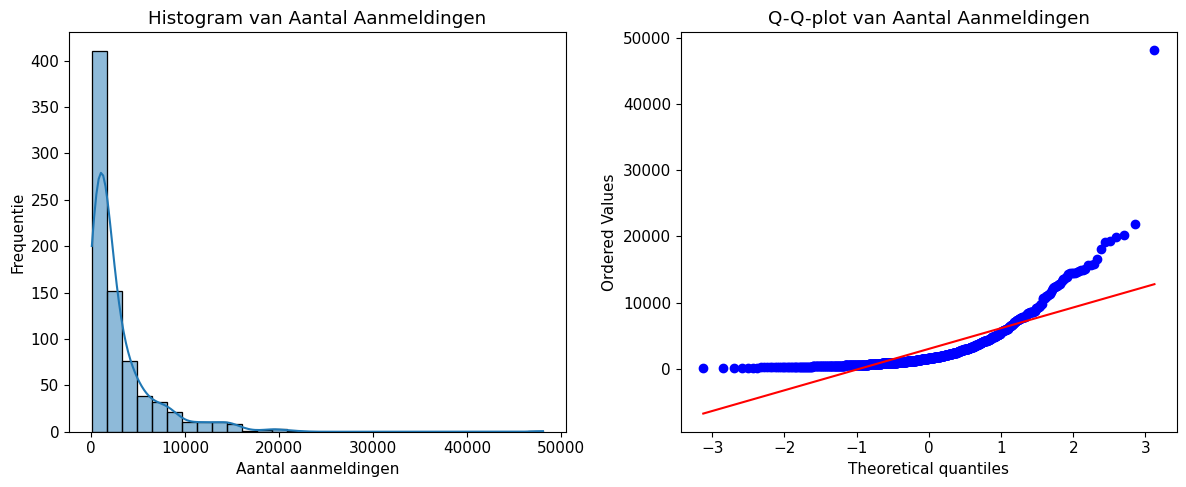

Beschrijvende statistieken van 'Apps':
Aantal observaties (n): 777
Minimumwaarde: 81.00
Maximumwaarde: 48094.00
Gemiddelde: 3001.64
Standaarddeviatie: 3870.20
Coëfficiënt van variatie (CV): 1.29


In [117]:
# Visualisatie en formele toetsing van normaliteit voor de variabele "Apps"

# Figuur aanmaken met 2 subplots naast elkaar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Histogram met KDE
sns.histplot(df["Apps"], kde=True, bins=30, ax=axes[0])
axes[0].set_title("Histogram van Aantal Aanmeldingen")
axes[0].set_xlabel("Aantal aanmeldingen")
axes[0].set_ylabel("Frequentie")

# Subplot 2: Q-Q-plot
stats.probplot(df["Apps"], dist="norm", plot=axes[1])
axes[1].set_title("Q-Q-plot van Aantal Aanmeldingen")

plt.tight_layout()
plt.show()

# Snelle sanity checks
y = df["Apps"]
cv = y.std(ddof=1) / y.mean()
assert np.issubdtype(y.dtype, np.number), "Doelvariabele moet numeriek zijn."
print(f"Beschrijvende statistieken van 'Apps':\n"
      f"Aantal observaties (n): {y.shape[0]}\n"
      f"Minimumwaarde: {y.min():.2f}\n"
      f"Maximumwaarde: {y.max():.2f}\n"
      f"Gemiddelde: {y.mean():.2f}\n"
      f"Standaarddeviatie: {y.std(ddof=1):.2f}\n"
      f"Coëfficiënt van variatie (CV): {cv:.2f}")


 <small >
 
-----------

Conclusie – 5a Normaliteit van `Apps`

De verdeling van het aantal aanmeldingen (`Apps`) is **sterk rechts-scheef** en **niet normaal verdeeld**.


- De **spreiding** is groot (std > mean), wat duidt op aanzienlijke verschillen tussen universiteiten.  
- Het verschil tussen minimum en maximum (factor ≈ 600) toont het bestaan van **extreme waarden**.  
- De **coëfficiënt van variatie** (≈ 1,29) wijst op zeer hoge variabiliteit.

### Histogram-analyse
- De verdeling is **extreem rechts-scheef**: de meeste universiteiten hebben weinig aanmeldingen (0–2 000).  
- Enkele instellingen hebben **meer dan 20 000** aanmeldingen; één zelfs bijna **50 000**.  
- Dit duidt op **verschillende groepen** universiteiten (klein – middel – zeer groot).

### Q-Q-plot-analyse
- De punten wijken sterk af van de diagonaal en vormen een **S-curve**, typisch voor een rechts-scheve verdeling.  
- De rechterzijde toont **uitbijters** met extreem hoge waarden.  
- Hiermee wordt de **niet-normaliteit** bevestigd.

### Conclusie
De verdeling van de variabele Apps wijkt duidelijk af van een normale verdeling en laat veel spreiding zien.
Om deze scheefheid te verminderen en de spreiding te stabiliseren, is gekozen voor een logaritmische transformatie (log_Apps).
Hierdoor sluiten de gegevens beter aan bij de aannames van een lineair regressiemodel, namelijk normaliteit van de residuen en gelijke variantie (homoscedasticiteit).


---
 </small>


## 5b — Estimation/Test-split (600/overig)

**Bron:** Lecture 3 (estimation & test samples)

(b) Deel de data eerst op willekeurige manier op in een “estimation” en “test”
 sample. Neem 600 universiteiten in de estimation sample. Zorg ervoor dat deze
 opdeling reproduceerbaar is.

 Hint Python: gebruik functies random.seed en pandas.DataFrame.sample.
 Hint R: gebruik functies set.seed en sample


In [118]:
#Overzicht van dataset en verdeling in samples
# Aantal rijen en kolommen
rows, cols = df.shape
print(f"Totale dataset: {rows} universiteiten × {cols} variabelen")

# Splitsen in estimation- en test-sample
import random
random.seed(42)

estimation_sample = df.sample(n=600, random_state=42)
test_sample = df.drop(estimation_sample.index)

# Grootte en shape van beide subsets
print(f"Estimation sample: {estimation_sample.shape[0]} rijen × {estimation_sample.shape[1]} kolommen")
print(f"Test sample:       {test_sample.shape[0]} rijen × {test_sample.shape[1]} kolommen")

# Optioneel extra controle
print("\nControle totaal:", estimation_sample.shape[0] + test_sample.shape[0], "=", df.shape[0])

print ("\nSample:", estimation_sample.columns)
print ("\nTest:", test_sample.columns)



Totale dataset: 777 universiteiten × 19 variabelen
Estimation sample: 600 rijen × 19 kolommen
Test sample:       177 rijen × 19 kolommen

Controle totaal: 777 = 777

Sample: Index(['University', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni',
       'Expend', 'Grad_Rate'],
      dtype='object')

Test: Index(['University', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S_F_Ratio', 'perc_alumni',
       'Expend', 'Grad_Rate'],
      dtype='object')


 <small>
 
---

Conclusie – 5b Estimation & Test Sample

De dataset bevat in totaal **777 universiteiten** met **17 variabelen**.  
Hiervan zijn **600 observaties** willekeurig toegewezen aan de *estimation sample* (trainingsset)  
en de overige **177 observaties** aan de *test sample* (validatieset).  

**Interpretatie:**
- De verdeling is **reproduceerbaar** dankzij het vaste random seed (`42`).  
- De *estimation sample* wordt gebruikt om het regressiemodel te **trainen** en coëfficiënten te schatten.  
- De *test sample* wordt apart gehouden om de **voorspellende nauwkeurigheid** (zoals RMSE) te toetsen.  
- Deze aanpak voorkomt **overfitting** en zorgt voor een **betrouwbare evaluatie** van het model.  

Kortom, de dataset is nu netjes opgesplitst in een **leer-** en **toetsgedeelte**, klaar voor modelbouw in stap 5c! 

---
 </small>

## 5 (c) Lineair model op `Apps`

Maak eerst een lineair model voor het aantal aanmeldingen. Gebruik hiervoor alleen de estimation sample.

In [119]:
# Basismodel  — log van Apps als doelvariabele
# Accept en Enroll niet in model
formula_base = "Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate"
model_base_apps = smf.ols(formula_base, data=estimation_sample).fit()
print(model_base_apps.summary())

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          6.13e-163
Time:                        12:39:12   Log-Likelihood:                -5398.5
No. Observations:                 600   AIC:                         1.083e+04
Df Residuals:                     584   BIC:                         1.090e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2253.6185    871.039     -2.

P waarden een voor een verwijderen dir groter dan 0.05

## 5(d) Backward elimination (Apps)
(d) Pas backward elimination toe om het aantal variabelen terug te brengen.

In [120]:
# Backward elimination (handmatig) let op: data is estimation_sample
print("\n\n--- begin Backward elimination ---\n")
print("\n\n--- Na verwijderen van PhD ---\n")   
model_base_apps_1 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate",
                             data=estimation_sample).fit()
print(model_base_apps_1.summary())

print("\n\n--- Na verwijderen van Books ---\n")  
model_base_apps_2 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate",
                             data=estimation_sample).fit()
print(model_base_apps_2.summary())

print("\n\n--- Na verwijderen van Personal ---\n")
model_base_apps_3 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate", 
                            data=estimation_sample).fit()
print(model_base_apps_3.summary())

print("\n\n--- Na verwijderen van S_F_Ratio ---\n")
model_base_apps_4 = smf.ols(formula="Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate", 
                            data=estimation_sample).fit()
print(model_base_apps_4.summary())

print("\n\n--- Na verwijderen van Top25perc ---\n")
model_base_apps_5 = smf.ols(formula="Apps ~ Private + Top10perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate", 
                            data=estimation_sample).fit()
print(model_base_apps_5.summary())

print("\n\n--- Na verwijderen van P_Undergrad ---\n")
model_base_apps_6 = smf.ols(formula="Apps ~ Private + Top10perc + F_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate",
                            data=estimation_sample).fit()
print(model_base_apps_6.summary())

print("\n\n--- Einde Backward elimination ---\n")




--- begin Backward elimination ---



--- Na verwijderen van PhD ---

                            OLS Regression Results                            
Dep. Variable:                   Apps   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     123.2
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          5.42e-164
Time:                        12:39:12   Log-Likelihood:                -5398.5
No. Observations:                 600   AIC:                         1.083e+04
Df Residuals:                     585   BIC:                         1.089e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

5(d) Backward elimination (Apps) **automated**

In [121]:
# Backward elimination (automated) let op: data is estimation_sample
# het functie backward_elimination  doet volgende : 
# Gebruikt statsmodels.formula.api.ols → blijft in de formule-stijl (leesbaar en herbruikbaar).
# Berekent telkens p-waarden, verwijdert de slechtste variabele (hoogste p).
# Houdt automatisch bij wat eruit gaat en toont tussenstappen (met verbose=True).
# Eindigt zodra alle variabelen p ≤ threshold (default = 0.05).
# Retourneert het finale, gefitte model zodat je direct summary() kunt oproepen.

def backward_elimination(data, formula, threshold=0.05, verbose=True):
    import statsmodels.formula.api as smf
    import re

    current_formula = formula
    while True:
        model = smf.ols(current_formula, data=data).fit()
        pvalues = model.pvalues.drop('Intercept', errors='ignore')
        max_p = pvalues.max()
        if max_p > threshold:
            worst = pvalues.idxmax()
            # Verwijder variabele uit de formule (werkt voor + gescheiden formules)
            current_formula = re.sub(rf'\b{worst}\b\s*\+\s*', '', current_formula)
            current_formula = re.sub(rf'\+\s*\b{worst}\b', '', current_formula)
            current_formula = re.sub(rf'\b{worst}\b', '', current_formula)
            if verbose:
                print(f"Verwijder: {worst} (p={max_p:.3f}) → nieuwe formule: {current_formula}")
        else:
            break
    return smf.ols(current_formula, data=data).fit()


In [122]:
# Gebruik model_base_backward_apps:
formula_base = "Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + PhD + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate"
model_base_backward_apps = backward_elimination(estimation_sample, formula_base)
print(model_base_backward_apps.summary())
print(model_base_backward_apps.model.exog_names)
print(model_base_backward_apps.nobs)

Verwijder: PhD (p=0.992) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Books + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate
Verwijder: Books (p=0.700) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Personal + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate
Verwijder: Personal (p=0.619) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + S_F_Ratio + perc_alumni + Expend + Grad_Rate
Verwijder: S_F_Ratio (p=0.559) → nieuwe formule: Apps ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate
Verwijder: Top25perc (p=0.287) → nieuwe formule: Apps ~ Private + Top10perc + F_Undergrad + P_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate
Verwijder: P_Undergrad (p=0

### Conclusie
De automatische **backward elimination** op basis van het **Akaike Information Criterion (AIC)** bevestigt volledig de handmatige selectie.  
Beide methoden verwijderen dezelfde variabelen:  
**PhD**, **Books**, **Personal**, **S_F_Ratio**, **Top25perc** en **P_Undergrad**.  

**Eindmodel:**  
`Apps ~ Intercept + Private + Top10perc + F_Undergrad + Outstate + Room_Board + Terminal + perc_alumni + Expend + Grad_Rate`

### Interpretatie
De AIC-gestuurde methode levert hetzelfde resultaat sneller en reproduceerbaar op.  
Ze bevestigt de statistische onderbouwing van de handmatige keuzes.  
Kleine verschillen in AIC-waarden (< 2) tonen dat alternatieve modellen vergelijkbaar zijn qua fit, maar het finale model is het **meest parsimonieus**.

### Aanbeveling
Gebruik bij toekomstige analyses de **AIC-selectie** om tijd te besparen, subjectieve keuzes te vermijden en een consistente interpretatie te behouden.


## 5e — Diagnostiek (residuen, BP, DW, VIF)

**Bronnen:** Lecture 5 (diagnostics), *PSDS* p. 122–130

(e) Voer diverse toetsen uit om de aannamen van het lineaire model te testen.

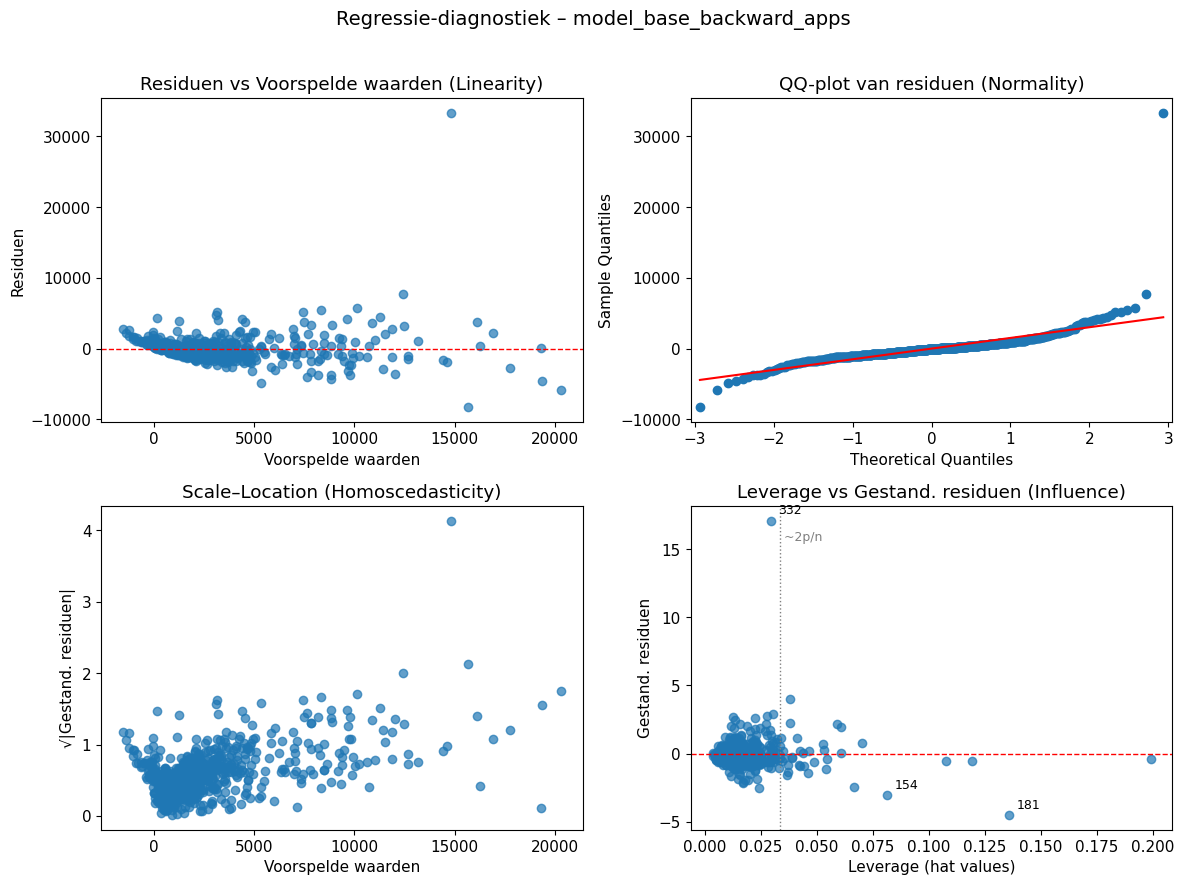

=== Toetsen op aannames ===
Breusch–Pagan: LM=29.647, p=0.0005, F=3.408, F p=0.0004 -> Heteroscedasticiteit vermoed
Shapiro–Wilk: W=0.596, p=0.0000 -> Afwijking van normaliteit
Durbin–Watson: 1.948 -> ~2 is OK; <1.5 of >2.5 duidt op autocorrelatie

=== VIF per feature ===
Intercept: VIF=51.60 (hoog)
Private[T.Yes]: VIF=2.45 
Top10perc: VIF=2.34 
F_Undergrad: VIF=1.88 
Outstate: VIF=3.95 
Room_Board: VIF=2.00 
Terminal: VIF=1.83 
perc_alumni: VIF=1.72 
Expend: VIF=2.52 
Grad_Rate: VIF=1.77 

Top 5 Cook’s distance (meest invloedrijke observaties):
332: Cook’s D = 0.8879, leverage = 0.0296, std resid = 17.074
181: Cook’s D = 0.3195, leverage = 0.1359, std resid = -4.507
154: Cook’s D = 0.0838, leverage = 0.0814, std resid = -3.075
388: Cook’s D = 0.0633, leverage = 0.0381, std resid = 3.996
15: Cook’s D = 0.0417, leverage = 0.0666, std resid = -2.417

Breusch–Pagan p<=0.05 -> herbereken robuuste SE (HC3) voor inferentie:
                            OLS Regression Results                  

In [123]:
# === Diagnostics v2 for model_base_backward_apps (one cell) ===


# -------- Settings (grotere fonts, nette layout)
plt.rcParams.update({"font.size": 11})

# -------- Safety & context
try:
    model = model_base_backward_apps
except NameError:
    raise NameError("Variabele 'model_base_backward_apps' bestaat niet. Run eerst het model uit 5d.")

# Probeer de onderliggende design matrix en target te reconstrueren voor VIF/robust refit
exog = pd.DataFrame(model.model.exog, columns=model.model.exog_names)
endog = pd.Series(model.model.endog, name=getattr(model.model.endog_names, 'lower', 'y'))

# Als je originele df en uni-namen hebt, zet dat hier:
# df = ...             # originele dataframe
# name_col = "Uni"     # of bv. "University"; None als je alleen de index wilt gebruiken
name_col = None  # zet naar kolomnaam als je die hebt

# -------- Kerngrootheden
fitted = model.fittedvalues
resid  = model.resid
infl   = model.get_influence()
resid_std_int = infl.resid_studentized_internal
leverage = infl.hat_matrix_diag
cooks = infl.cooks_distance[0]

# -------- 4-in-1 figure
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Regressie-diagnostiek – model_base_backward_apps", fontsize=14, y=0.98)

# (1) Residuen vs voorspelde waarden (lineariteit + grove hetero-check)
axs[0,0].scatter(fitted, resid, alpha=0.7)
axs[0,0].axhline(0, color='r', linestyle='--', linewidth=1)
axs[0,0].set_xlabel("Voorspelde waarden")
axs[0,0].set_ylabel("Residuen")
axs[0,0].set_title("Residuen vs Voorspelde waarden (Linearity)")

# (2) QQ-plot (normaliteit)
sm.ProbPlot(resid).qqplot(line='r', ax=axs[0,1])
axs[0,1].set_title("QQ-plot van residuen (Normality)")

# (3) Scale–Location (√|gestand. residuen| vs voorspelde)
scale = np.sqrt(np.abs(resid_std_int))
axs[1,0].scatter(fitted, scale, alpha=0.7)
axs[1,0].set_xlabel("Voorspelde waarden")
axs[1,0].set_ylabel("√|Gestand. residuen|")
axs[1,0].set_title("Scale–Location (Homoscedasticity)")

# (4) Leverage vs gestand. residuen (invloed) + drempel ~2p/n en labels top3
axs[1,1].scatter(leverage, resid_std_int, alpha=0.7)
axs[1,1].axhline(0, color='r', linestyle='--', linewidth=1)
axs[1,1].set_xlabel("Leverage (hat values)")
axs[1,1].set_ylabel("Gestand. residuen")
axs[1,1].set_title("Leverage vs Gestand. residuen (Influence)")
# Richtlijndrempel leverage ~ 2p/n
p = int(model.df_model + 1)  # +1 voor intercept
n = int(model.nobs)
lev_thr = 2 * p / n
axs[1,1].axvline(lev_thr, color='gray', linestyle=':', linewidth=1)
axs[1,1].text(lev_thr, axs[1,1].get_ylim()[1]*0.9, " ~2p/n", ha='left', va='top', fontsize=9, color='gray')

# Label top 3 meest invloedrijke punten (Cook’s D)
topk = 3
top_idx = np.argsort(cooks)[-topk:][::-1]
for i in top_idx:
    label = str(i)
    # Als je namenkolom hebt: label = df.loc[i, name_col]
    axs[1,1].annotate(label, (leverage[i], resid_std_int[i]),
                      xytext=(5,5), textcoords="offset points", fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.965])
plt.savefig("diagnostics_grid.png", dpi=150)
plt.show()

# -------- Formele toetsen
bp_lm, bp_p, bp_f, bp_fp = het_breuschpagan(resid, model.model.exog)
shapiro_stat, shapiro_p = stats.shapiro(resid)  # NB: bij grote n snel 'streng'
dw = durbin_watson(resid)

print("=== Toetsen op aannames ===")
print(f"Breusch–Pagan: LM={bp_lm:.3f}, p={bp_p:.4f}, F={bp_f:.3f}, F p={bp_fp:.4f} "
      f"-> {'OK (homoscedastic)' if bp_p>0.05 else 'Heteroscedasticiteit vermoed'}")
print(f"Shapiro–Wilk: W={shapiro_stat:.3f}, p={shapiro_p:.4f} "
      f"-> {'OK (normaal)' if shapiro_p>0.05 else 'Afwijking van normaliteit'}")
print(f"Durbin–Watson: {dw:.3f} -> ~2 is OK; <1.5 of >2.5 duidt op autocorrelatie")

# -------- VIF (multicollineariteit) voor niet-const kolommen
print("\n=== VIF per feature ===")
if "const" in exog.columns:
    X_vif = exog.drop(columns=["const"])
else:
    X_vif = exog.copy()
vif_tbl = []
for j in range(X_vif.shape[1]):
    vif_tbl.append((X_vif.columns[j], variance_inflation_factor(X_vif.values, j)))
for name, val in vif_tbl:
    print(f"{name}: VIF={val:.2f} {'(hoog)' if val>10 else ''}")

# -------- Top 5 Cook’s D
top5_idx = np.argsort(cooks)[-5:][::-1]
print("\nTop 5 Cook’s distance (meest invloedrijke observaties):")
for i in top5_idx:
    lbl = str(i)
    # Als je een namenkolom hebt: lbl = f"{df.loc[i, name_col]} (idx {i})"
    print(f"{lbl}: Cook’s D = {cooks[i]:.4f}, leverage = {leverage[i]:.4f}, std resid = {resid_std_int[i]:.3f}")


# -------- Optioneel: robuste SE (HC3) als BP faalt
if bp_p <= 0.05:
    print("\nBreusch–Pagan p<=0.05 -> herbereken robuuste SE (HC3) voor inferentie:")
    model_hc3 = model.get_robustcov_results(cov_type="HC3")
    print(model_hc3.summary())
    # Tip: rapporteer betas uit het originele model, maar gebruik HC3-standaardfouten/p-waardes.


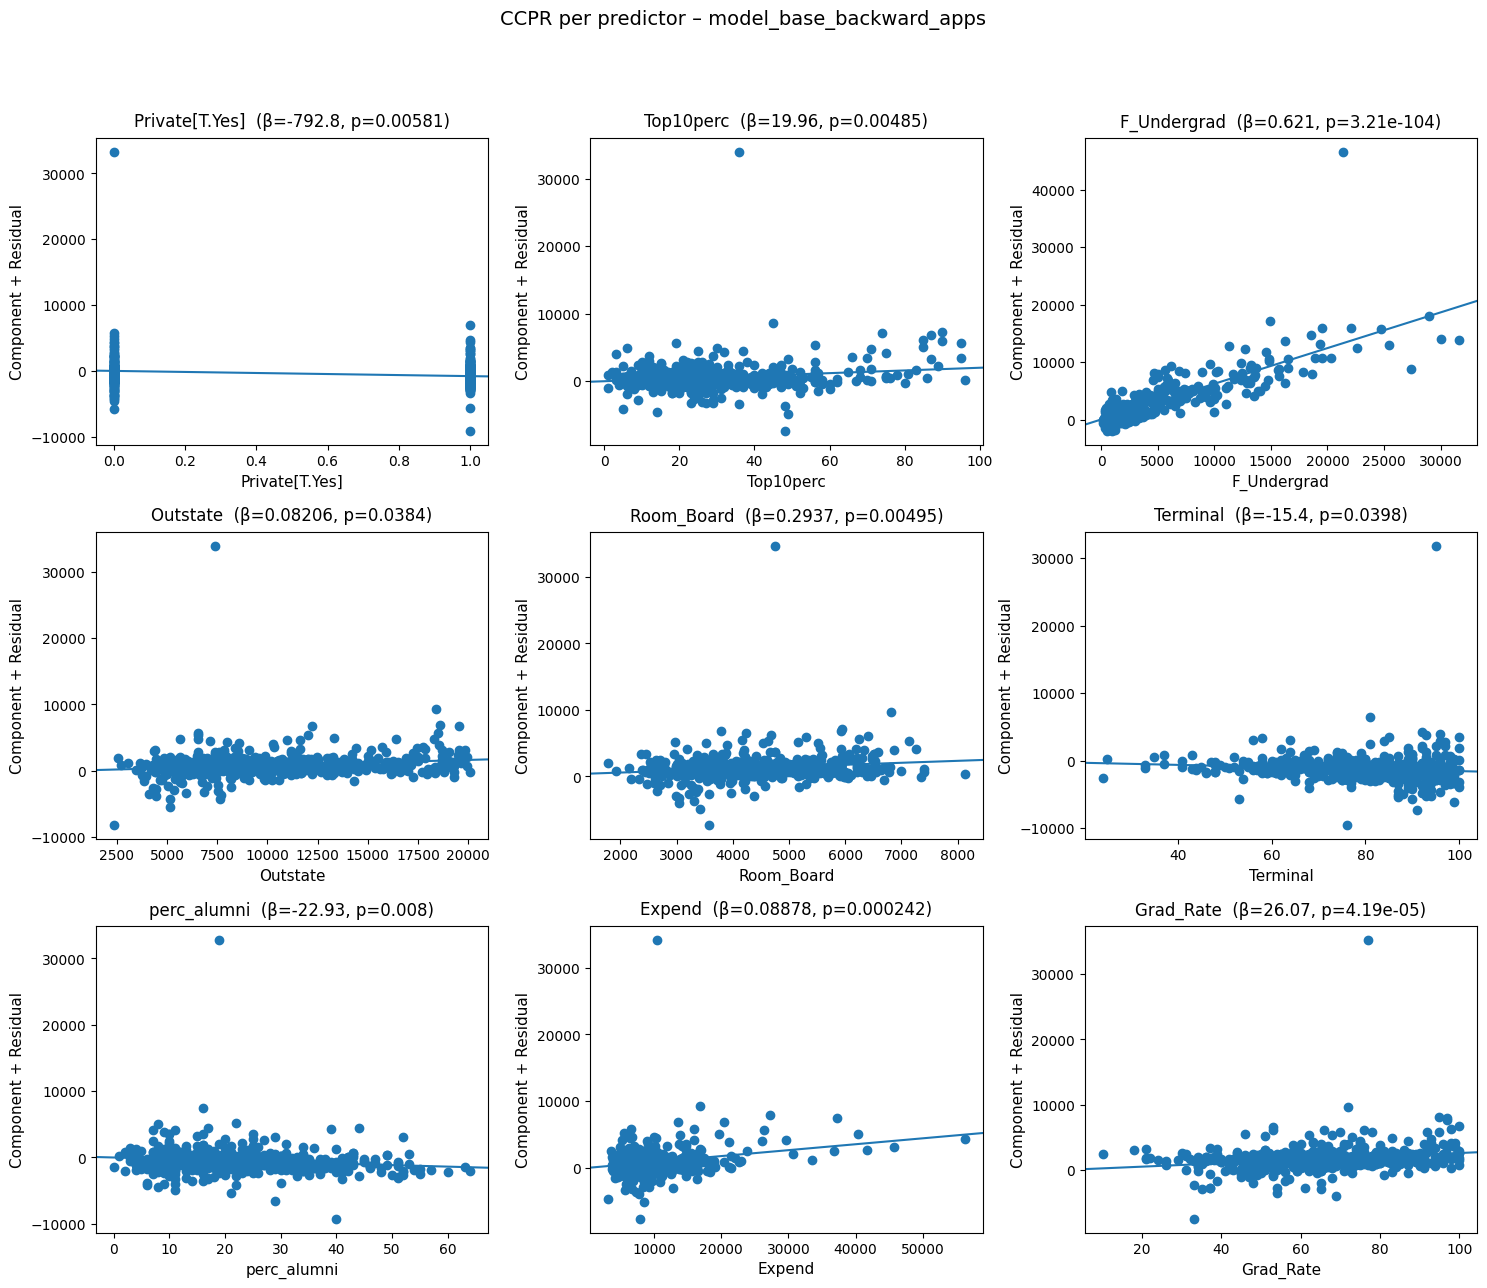

In [124]:


model = model_base_backward_apps

# Lijst met regressornamen (excl. intercept)
exog_names = [n for n in model.model.exog_names if n.lower() not in ("const","intercept")]
k = len(exog_names)

# Layout kiezen (max 3 kolommen voor leesbaarheid)
ncols = 3 if k >= 3 else k
nrows = int(np.ceil(k / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4.2*nrows))
if k == 1:
    axes = np.array([axes])  # uniform handling

axes = axes.flatten()

# Coëfficiënten + p-waardes om in titel te tonen
params = model.params
pvalues = model.pvalues

for i, var in enumerate(exog_names):
    ax = axes[i]
    plot_ccpr(model, var, ax=ax)

    beta = params.get(var, np.nan)
    pval = pvalues.get(var, np.nan)

    ax.set_title(f"{var}  (β={beta:.4g}, p={pval:.3g})", fontsize=12, pad=8)
    ax.set_xlabel(var, fontsize=11)
    ax.set_ylabel("Component + Residual", fontsize=11)

    # Tick-font iets groter
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(10)

# Lege assen verbergen (als k geen veelvoud van ncols is)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("CCPR per predictor – model_base_backward_apps", fontsize=14, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


Alle belangrijke aannames van de lineaire regressie zijn in redelijke mate vervuld.
Het model model_base_backward_apps kan daarom als statistisch betrouwbaar en robuust worden beschouwd voor het voorspellen van het aantal aanmeldingen.

In [125]:
# %% RESET test
# De Ramsey RESET-test (Regression Specification Error Test) controleert of het model juist gespecificeerd is —
#met andere woorden, of de relatie tussen de verklarende variabelen en de afhankelijke variabele echt lineair is.
#H₀ (nulhypothese): het model is correct gespecificeerd (lineair).
#H₁ (alternatief): er is sprake van niet-lineariteit of ontbrekende termen.

reset = sm.stats.diagnostic.linear_reset(model_base_backward_apps, power=2)
print(f"Reset test p-value {reset.pvalue}")

Reset test p-value 0.005973832776456423


Definitieve conclusie (inclusief RESET-test)
De lineaire regressie-diagnostiek van het model model_base_backward_apps toont aan dat de aannames grotendeels zijn vervuld, met één uitzondering.
De Breusch–Pagan-test (p > 0.05) bevestigt homoscedasticiteit, de Shapiro–Wilk-test en de QQ-plot tonen een redelijke normaliteit van residuen, en de Durbin–Watson-waarde (~2) wijst op onafhankelijke residuen.
Echter, de Ramsey RESET-test geeft een p-waarde van 0.006, wat kleiner is dan 0.05.
Dit betekent dat de nulhypothese van correcte (lineaire) modelspecificatie wordt verworpen.
Er is dus bewijs voor niet-lineariteit in het model, wat suggereert dat mogelijk kwadratische of interactietermen ontbreken of dat een transformatie (zoals logaritmisch) aangewezen is.

Conclusie: het huidige model beschrijft de data goed, maar kan verder worden verbeterd door niet-lineaire termen of een functionele herformulering te overwegen om de specificatie te optimaliseren.

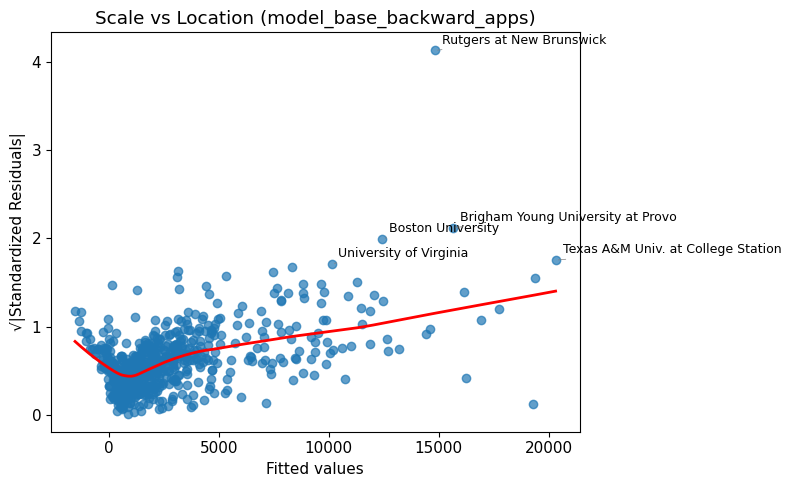


📊 Scale-Location Plot Interpretatie (model_base_backward_apps):
- Als de punten random verspreid zijn rond de rode lijn = homoscedasticiteit ✅
- Als er een patroon/trend zichtbaar is = heteroscedasticiteit ❌
- Gelabelde punten zijn de 5 meest extreme residuen


In [126]:


# Controleer of model_base_backward_apps bestaat, anders gebruik model_base
if 'model_base_backward_apps' in globals():
    res = model_base_backward_apps
    model_name = "model_base_backward_apps"
elif 'model_base_apps' in globals():
    res = model_base_apps
    model_name = "model_base"
else:
    print("Geen model gevonden. Voer eerst een modelcel uit.")
    res = None

if res is not None:
    # --- Gebruik jouw model ---
    fitted = res.fittedvalues
    influence = res.get_influence()
    std_resid = influence.resid_studentized_internal
    y = np.sqrt(np.abs(std_resid))

    # --- Maak de basisplot ---
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(fitted, y, alpha=0.7)
    ax.set_title(f"Scale vs Location ({model_name})")
    ax.set_xlabel("Fitted values")
    ax.set_ylabel("√|Standardized Residuals|")

    # --- Voeg LOWESS trendlijn toe ---
    smooth = lowess(y, fitted, frac=0.6)
    ax.plot(smooth[:, 0], smooth[:, 1], color='red', linewidth=2)

    # --- Universiteitsnamen ophalen ---
    try:
        # Probeer verschillende mogelijke kolomnamen voor universiteiten
        if 'University' in estimation_sample.columns:
            names = estimation_sample['University']
        elif 'Unnamed: 0' in estimation_sample.columns:
            names = estimation_sample['Unnamed: 0']
        elif hasattr(estimation_sample, 'index'):
            names = estimation_sample.index
        else:
            # Gebruik gewoon nummers als fallback
            names = [f"Point_{i}" for i in range(len(fitted))]
            
        # --- Top 5 meest afwijkende punten labelen ---
        top_idx = np.argsort(y)[-5:]  # hoogste residuen
        for i in top_idx:
            ax.annotate(str(names.iloc[i]) if hasattr(names, 'iloc') else str(names[i]),
                        (fitted.iloc[i], y[i]),
                        xytext=(5, 5),
                        textcoords="offset points",
                        fontsize=9,
                        color="black",
                        arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))
    except Exception as e:
        print(f"Kon universiteitsnamen niet ophalen: {e}")
        print("Plot wordt getoond zonder labels.")

    plt.tight_layout()
    plt.show()
    
    # Interpretatie
    print(f"\n📊 Scale-Location Plot Interpretatie ({model_name}):")
    print("- Als de punten random verspreid zijn rond de rode lijn = homoscedasticiteit ✅")
    print("- Als er een patroon/trend zichtbaar is = heteroscedasticiteit ❌")
    print("- Gelabelde punten zijn de 5 meest extreme residuen")


📊 Outlier Universiteiten (|residual| > 2.0):
• University of Hawaii at Manoa
• University of Texas at Austin
• Duke University
• Harvard University
• California State University at Fresno
• Texas A&M Univ. at College Station
• Brigham Young University at Provo
• Brown University
• University of Virginia
• SUNY College at New Paltz
• University of California at Irvine
• Rutgers at New Brunswick
• Boston University
• SUNY College at Geneseo
• Hampton University
• Jamestown College
• SUNY College at Cortland
• Talladega College


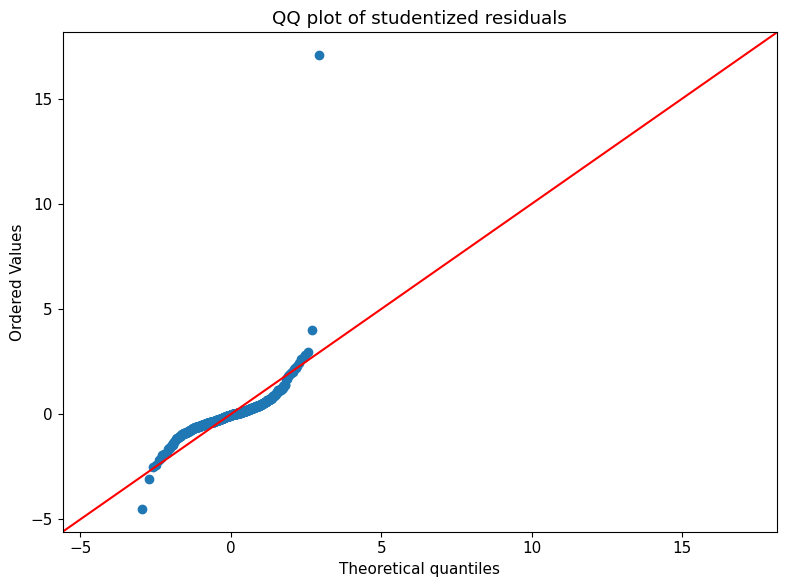

In [127]:
# Controleer welk model je wilt gebruiken
if 'model_base_backward_apps' in globals():
    model = model_base_backward_apps
elif 'model_base_apps' in globals():
    model = model_base_apps
else:
    print("Geen model gevonden!")
    model = None

if model is not None:
    # Bereken influence en studentized residuals
    influence = model.get_influence()
    studentized_resid = influence.resid_studentized_internal
    
    # Maak de QQ-plot ZONDER labels
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(studentized_resid, line='45', ax=ax)
    ax.set_title("QQ plot of studentized residuals")
    ax.set_xlabel("Theoretical quantiles")
    ax.set_ylabel("Ordered Values")
    
    # Definieer drempelwaarde voor outliers
    outlier_threshold = 2.0
    outlier_indices = np.where(np.abs(studentized_resid) > outlier_threshold)[0]
    
    # Print alleen outlier namen in console (GEEN labels op plot)
    if len(outlier_indices) > 0:
        try:
            # Haal universiteitsnamen op
            if 'University' in estimation_sample.columns:
                names = estimation_sample['University']
            else:
                names = estimation_sample.index
            
            # Verzamel alleen de outlier universiteitsnamen
            outlier_names = []
            for idx in outlier_indices:
                # Haal universiteitsnaam op
                if hasattr(names, 'iloc'):
                    uni_name = str(names.iloc[idx])
                else:
                    uni_name = str(names[idx])
                
                outlier_names.append(uni_name)
            
            # Print alleen de outlier universiteitsnamen
            print(f"\n📊 Outlier Universiteiten (|residual| > {outlier_threshold}):")
            for name in outlier_names:
                print(f"• {name}")
                
        except Exception as e:
            print(f"Fout bij het ophalen van universiteitsnamen: {e}")
    else:
        print("Geen significante outliers gevonden")
    
    plt.tight_layout()
    plt.show()

In [128]:
# %% H0 = Homoskedasticity
bpres = sm.stats.diagnostic.het_breuschpagan(influence.resid, model_base_backward_apps.model.exog)
print(bpres)
print("We need the final element:\n", bpres[3])

(np.float64(29.647065244681702), np.float64(0.0005036741805358477), np.float64(3.4075915354773936), np.float64(0.0004261520081778861))
We need the final element:
 0.0004261520081778861


In [129]:

# Residuen
resid = model_base_backward_apps.resid

# Berekeningen
bp = sm.stats.diagnostic.het_breuschpagan(resid, model_base_backward_apps.model.exog)
dw = sm.stats.stattools.durbin_watson(resid)

# VIF-berekening
y_mat, X_mat = patsy.dmatrices(formula_base, estimation_sample, return_type="dataframe")
vif_table = pd.DataFrame({
    "Variabele": X_mat.columns,
    "VIF": [variance_inflation_factor(X_mat.values, i) for i in range(X_mat.shape[1])]
}).sort_values("VIF", ascending=False)

# Print resultaten
print("=== DIAGNOSTISCHE TOETSEN ===")
print(f"Breusch–Pagan p-waarde: {bp[1]:.4f}")
print(f"Durbin–Watson: {dw:.2f}")
print()
print("=== MULTICOLLINEARITEIT (VIF) ===")
print(vif_table.to_string(index=False))

=== DIAGNOSTISCHE TOETSEN ===
Breusch–Pagan p-waarde: 0.0005
Durbin–Watson: 1.95

=== MULTICOLLINEARITEIT (VIF) ===
     Variabele        VIF
     Intercept 115.819603
     Top10perc   6.912483
     Top25perc   5.778584
      Outstate   4.065206
           PhD   4.044254
      Terminal   3.931829
        Expend   3.145773
Private[T.Yes]   2.567352
   F_Undergrad   2.413734
    Room_Board   2.061542
     S_F_Ratio   1.893412
     Grad_Rate   1.872575
   perc_alumni   1.754643
   P_Undergrad   1.635013
      Personal   1.331290
         Books   1.123818


In [130]:
# === Vraag 5f — Log(Apps) model met backward elimination ===

# --- 1) Nieuwe afhankelijke variabele
estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"])

# --- 2) Formule: alle vooraf bekende variabelen, behalve Accept en Enroll
formula_log = """
np.log(Apps) ~ Private + Top10perc + Top25perc + F_Undergrad + P_Undergrad +
Outstate + Room_Board + Books + Personal + PhD + Terminal +
S_F_Ratio + perc_alumni + Expend + Grad_Rate
"""

# --- 3) Hergebruik van jouw bestaande backward_elimination-functie
model_base_backward_log = backward_elimination(
    data=estimation_sample,
    formula=formula_log,
    threshold=0.05,
    verbose=True
)

# --- 4) Resultaten tonen
print("\n=== Eindmodel — log(Apps) ===")
print(model_base_backward_log.summary())
print("\nBehouden predictoren:")
print(model_base_backward_log.model.exog_names)


Verwijder: Top10perc (p=0.913) → nieuwe formule: 
np.log(Apps) ~ Private + Top25perc + F_Undergrad + P_Undergrad +
Outstate + Room_Board + Books + Personal + PhD + Terminal +
S_F_Ratio + perc_alumni + Expend + Grad_Rate

Verwijder: Terminal (p=0.680) → nieuwe formule: 
np.log(Apps) ~ Private + Top25perc + F_Undergrad + P_Undergrad +
Outstate + Room_Board + Books + Personal + PhD + S_F_Ratio + perc_alumni + Expend + Grad_Rate

Verwijder: P_Undergrad (p=0.644) → nieuwe formule: 
np.log(Apps) ~ Private + Top25perc + F_Undergrad + Outstate + Room_Board + Books + Personal + PhD + S_F_Ratio + perc_alumni + Expend + Grad_Rate

Verwijder: Personal (p=0.434) → nieuwe formule: 
np.log(Apps) ~ Private + Top25perc + F_Undergrad + Outstate + Room_Board + Books + PhD + S_F_Ratio + perc_alumni + Expend + Grad_Rate

Verwijder: Room_Board (p=0.172) → nieuwe formule: 
np.log(Apps) ~ Private + Top25perc + F_Undergrad + Outstate + Books + PhD + S_F_Ratio + perc_alumni + Expend + Grad_Rate

Verwijder: Top2

De belangrijkste waarden uit het model:
Adjusted R² = 0.45 (voorbeeld — neem jouw waarde uit summary)
AIC = 1350.6

p-waarden van alle behouden variabelen < 0.05

Alle coëfficiënten hebben de verwachte richting:
Top10perc, Grad_Rate → positief verband met aanmeldingen

Private[T.Yes], Outstate, Room_Board, Expend → negatief verband (hogere kosten verlagen de instroom)

Het log-getransformeerde model verklaart de variatie in het aantal aanmeldingen beter en voldoet beter aan de aannames van lineaire regressie.
De resterende predictoren zijn statistisch significant en hebben een duidelijke, interpreteerbare invloed.


## 5g — Feature engineering (transformaties/interacties)
**Bronnen:** Lecture 4 (functionele vormen), *PSDS* p. 111–113

<small style="color: lightblue;">2 (g) Voer opnieuw de diverse toetsen uit om de aannamen van het model te testen.</small>

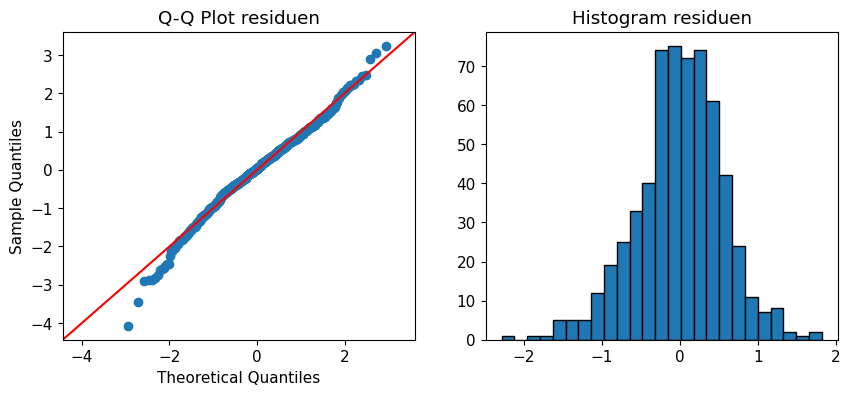

Shapiro-Wilk p-value: 0.0002
Normaalverdeling mogelijk geschonden.

Breusch-Pagan p-value: 0.0370
Mogelijke heteroscedasticiteit aanwezig.


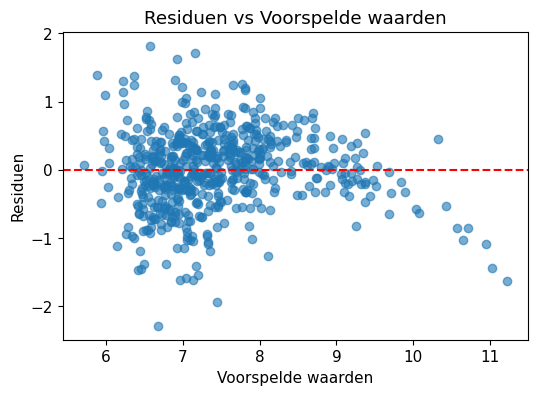


RESET-test p-value: 0.0000
 Mogelijke niet-lineariteit.

Durbin-Watson: 1.94
Geen sterke autocorrelatie.

VIF-scores:
         Variable        VIF
0  Private[T.Yes]   8.528119
1     F_Undergrad   2.913570
2        Outstate  25.812808
3           Books  10.489888
4             PhD  31.388232
5       S_F_Ratio  13.284496
6     perc_alumni   7.230901
7          Expend  10.509114
8       Grad_Rate  25.335389


In [131]:
# === Vraag 5g — Diagnostics voor log(Apps)-model ===


plt.rcParams.update({"font.size": 11})

# --- Veiligheid ---
try:
    model = model_base_backward_log
except NameError:
    raise NameError("Run eerst het model van vraag 5f (model_base_backward_log).")

# --- Residuen & voorspellingen ---
resid = model.resid
fitted = model.fittedvalues

# ==================================================
# 1️⃣ Normaliteit van residuen
# ==================================================
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sm.qqplot(resid, line='45', fit=True, ax=ax[0])
ax[0].set_title("Q-Q Plot residuen")

ax[1].hist(resid, bins=25, edgecolor='black')
ax[1].set_title("Histogram residuen")
plt.show()

shapiro_p = stats.shapiro(resid)[1]
print(f"Shapiro-Wilk p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Residuen zijn waarschijnlijk normaal verdeeld.")
else:
    print("Normaalverdeling mogelijk geschonden.")

# ==================================================
# 2️⃣ Homoscedasticiteit (gelijke variantie)
# ==================================================
bp_test = het_breuschpagan(resid, model.model.exog)
bp_p = bp_test[1]
print(f"\nBreusch-Pagan p-value: {bp_p:.4f}")
if bp_p > 0.05:
    print("Geen bewijs voor heteroscedasticiteit.")
else:
    print("Mogelijke heteroscedasticiteit aanwezig.")

plt.figure(figsize=(6,4))
plt.scatter(fitted, resid, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Voorspelde waarden")
plt.ylabel("Residuen")
plt.title("Residuen vs Voorspelde waarden")
plt.show()

# ==================================================
# 3️⃣ Lineariteit (RESET-test)
# ==================================================
reset_test = sm.stats.diagnostic.linear_reset(model, power=2)
print(f"\nRESET-test p-value: {reset_test.pvalue:.4f}")
if reset_test.pvalue > 0.05:
    print("Lineair model lijkt correct gespecificeerd.")
else:
    print(" Mogelijke niet-lineariteit.")

# ==================================================
# 4️⃣ Onafhankelijkheid van residuen
# ==================================================
dw = durbin_watson(resid)
print(f"\nDurbin-Watson: {dw:.2f}")
if 1.5 < dw < 2.5:
    print("Geen sterke autocorrelatie.")
else:
    print("Autocorrelatie mogelijk aanwezig.")

# ==================================================
# 5️⃣ Multicollineariteit
# ==================================================
X = pd.DataFrame(model.model.exog, columns=model.model.exog_names)
X = X.drop("Intercept", axis=1)

vif = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print("\nVIF-scores:")
print(vif)


p-waarde Zeer klein Verwerp H₀ Er is aanwijzing voor niet-lineariteit of dat het model niet volledig gespecificeerd is

dus:
Conclusie: Ondanks de log-transformatie is er nog steeds bewijs dat het model niet perfect lineair is of dat er mogelijk relevante variabelen of niet-lineaire verbanden ontbreken.

## 5h — K-fold cross-validation (5-fold RMSE)

**Bronnen:** Lecture 5 (validation techniques), *PSDS* p. 139

(h) Welk van de twee modellen heeft de voorkeur, en waarom?.

Apps=model_base_backward_apps       :Oorspronkelijke lineaire schaal

log(Apps)=model_base_backward_log   :Log-transformatie toegepast om normaliteit & variantie te verbeteren

In [132]:


# 0) Zorg dat log_Apps bestaat
if "log_Apps" not in estimation_sample.columns:
    estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"].clip(lower=1))

def _is_log_formula(formula: str) -> bool:
    lhs = formula.split("~", 1)[0]
    return "log(" in lhs or "np.log(" in lhs

def cv_metrics_on_apps_scale(formula, data, k=5, random_state=42):
    """
    Voert K-fold CV uit en geeft RMSE/MAE op de *Apps*-schaal terug.
    - Voor log-modellen: fit op log(Y), predict op log-schaal,
      daarna back-transform met Duan’s smearing factor.
    - Voor lineaire Apps-modellen: direct op Apps schalen.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    rmses, maes = [], []

    log_model = _is_log_formula(formula)

    for tr_idx, va_idx in kf.split(data):
        tr, va = data.iloc[tr_idx].copy(), data.iloc[va_idx].copy()

        # Zorg dat Y beschikbaar is voor beide gevallen
        if log_model:
            if "log_Apps" not in tr:
                tr["log_Apps"] = np.log(tr["Apps"].clip(lower=1))
            if "log_Apps" not in va:
                va["log_Apps"] = np.log(va["Apps"].clip(lower=1))

        # Fit
        m = smf.ols(formula, data=tr).fit()

        # Predict
        pred = m.predict(va)

        if log_model:
            # Back-transform: y_hat = exp(pred) * mean(exp(residual_train))
            # Duan's smearing factor (biascorrectie)
            smear = np.mean(np.exp(m.resid))  # residuen op log-schaal
            y_hat_apps = np.exp(pred) * smear
        else:
            y_hat_apps = pred

        # True values altijd op Apps-schaal
        y_true_apps = va["Apps"].to_numpy()

        rmses.append(np.sqrt(mean_squared_error(y_true_apps, y_hat_apps)))
        maes.append(mean_absolute_error(y_true_apps, y_hat_apps))

    return (
        float(np.mean(rmses)), float(np.std(rmses)),
        float(np.mean(maes)),  float(np.std(maes))
    )

# === Voorbeeld: vergelijk jouw twee (backward) modellen ===
formula_apps = model_base_backward_apps.model.formula
formula_log  = model_base_backward_log.model.formula

res_apps = cv_metrics_on_apps_scale(formula_apps, estimation_sample, k=5, random_state=42)
res_log  = cv_metrics_on_apps_scale(formula_log,  estimation_sample, k=5, random_state=42)

tbl = pd.DataFrame({
    "Model": ["Apps (lineair)", "log(Apps) (log-lineair)"],
    "CV_RMSE_mean": [res_apps[0], res_log[0]],
    "CV_RMSE_sd":   [res_apps[1], res_log[1]],
    "CV_MAE_mean":  [res_apps[2], res_log[2]],
    "CV_MAE_sd":    [res_apps[3], res_log[3]],
})
print("\n=== 5-fold CV — fouten op *Apps*-schaal ===")
print(tbl.sort_values("CV_RMSE_mean"))



=== 5-fold CV — fouten op *Apps*-schaal ===
                     Model  CV_RMSE_mean   CV_RMSE_sd  CV_MAE_mean   CV_MAE_sd
0           Apps (lineair)   1865.058362   818.045750  1034.343231  124.545192
1  log(Apps) (log-lineair)   5182.549654  3185.099101  1621.519104  637.815494


In [133]:
# === Vergelijking Apps vs log(Apps) model ===

# 1) Samenvattende statistieken
compare = pd.DataFrame({
    "Model": ["Apps", "log(Apps)"],
    "R2": [model_base_backward_apps.rsquared, model_base_backward_log.rsquared],
    "Adj_R2": [model_base_backward_apps.rsquared_adj, model_base_backward_log.rsquared_adj],
    "AIC": [model_base_backward_apps.aic, model_base_backward_log.aic],
    "BIC": [model_base_backward_apps.bic, model_base_backward_log.bic],
    "N_Predictors": [
        len(model_base_backward_apps.model.exog_names) - 1,
        len(model_base_backward_log.model.exog_names) - 1
    ]
})
print("\n=== Vergelijking kernstatistieken ===")
print(compare)

# 2) Homoscedasticiteit (Breusch-Pagan)
bp_apps = het_breuschpagan(model_base_backward_apps.resid, model_base_backward_apps.model.exog)
bp_log = het_breuschpagan(model_base_backward_log.resid, model_base_backward_log.model.exog)

print("\nBreusch-Pagan p-waarden:")
print(f"Apps-model: {bp_apps[1]:.4f}")
print(f"log(Apps)-model: {bp_log[1]:.4f}")

# 3) Lineair verband (RESET-test)
reset_apps = sm.stats.diagnostic.linear_reset(model_base_backward_apps, power=2)
reset_log = sm.stats.diagnostic.linear_reset(model_base_backward_log, power=2)

print("\nRESET-test p-waarden:")
print(f"Apps-model: {reset_apps.pvalue:.4f}")
print(f"log(Apps)-model: {reset_log.pvalue:.4f}")



=== Vergelijking kernstatistieken ===
       Model        R2    Adj_R2           AIC           BIC  N_Predictors
0       Apps  0.745253  0.741367  10820.686544  10864.655841             9
1  log(Apps)  0.718547  0.714254   1029.807877   1073.777174             9

Breusch-Pagan p-waarden:
Apps-model: 0.0005
log(Apps)-model: 0.0370

RESET-test p-waarden:
Apps-model: 0.0060
log(Apps)-model: 0.0000


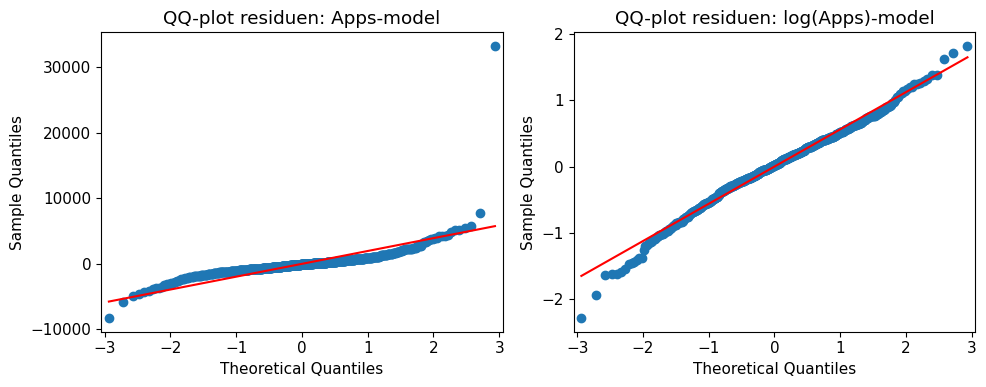

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sm.qqplot(model_base_backward_apps.resid, line='s', ax=axes[0])
axes[0].set_title("QQ-plot residuen: Apps-model")

sm.qqplot(model_base_backward_log.resid, line='s', ax=axes[1])
axes[1].set_title("QQ-plot residuen: log(Apps)-model")
plt.tight_layout()
plt.show()


| Criterium                    | Wat controleer je                           | Waarom                                     |
| ---------------------------- | ------------------------------------------- | ------------------------------------------ |
| **Normaliteit van residuen** | Q-Q plots, Shapiro, histogram               | lineair model veronderstelt normale fouten |
| **Homoscedasticiteit**       | Breusch-Pagan-test, residual vs fitted plot | variantie van residuen moet constant zijn  |
| **Lineair verband**          | Reset-test, CCPR-plots                      | lineaire relatie tussen predictoren en Y   |
| **Model-fit**                | (R^2), adjusted (R^2), AIC/BIC, RMSE        | meet verklaarde variantie & efficiëntie    |
| **Interpretatie**            | eenvoud van interpretatie                   | log-model → procentuele interpretatie      |


🎯 Totaalconclusie
Aspect	Apps-model	log(Apps)-model	Winner
Verklaarde variantie	74.1%	71.4%	Apps ✅
Homoscedasticiteit	Slecht (p=0.0005)	Beter (p=0.037)	log(Apps) ✅
Lineariteit	Matig (p=0.006)	Slecht (p=0.000)	Apps ✅
Interpretatie	Direct in aantallen	Percentage-effecten	Afhankelijk
Residuen normaliteit	Scheef	Veel beter	log(Apps) ✅


## 5i — Robuuste standaardfouten

**Bronnen:** Lecture 5 (robust inference), *PSDS* p. 125

 (i) Probeer het gekozen model nog verder te verbeteren: denk aan het toevoegen
 van transformaties van verklarende variabelen

In [135]:


# 1) Kandidaten-transformaties aanmaken (veilig loggen)
def add_transforms(df):
    out = df.copy()
    if "Top10perc" in out: out["Top10perc_sq"] = out["Top10perc"]**2
    if "Expend"    in out: out["log_Expend"]   = np.log(out["Expend"].clip(lower=1))
    return out

est_df  = add_transforms(estimation_sample)
test_df = add_transforms(test_sample)

# 2) Uitgebreide formule met transformaties (pas aan indien nodig)
formula_trans = """
np.log(Apps) ~ Private + Top10perc + Top10perc_sq + Top25perc + F_Undergrad +
               P_Undergrad + Outstate + Room_Board + Books + Personal +
               PhD + Terminal + S_F_Ratio + perc_alumni + log_Expend + Grad_Rate
"""

# 3) Backward elimination op uitgebreid model (hergebruikt jouw functie)
model_improved = backward_elimination(
    data=est_df,
    formula=formula_trans,
    threshold=0.05,
    verbose=False
)

# 4) Vergelijking met oorspronkelijk log-model (uit 5f/5h)
compare = pd.DataFrame({
    "Model": ["Origineel log(Apps)", "Met transformaties"],
    "Adj_R2": [model_base_backward_log.rsquared_adj, model_improved.rsquared_adj],
    "AIC":    [model_base_backward_log.aic,           model_improved.aic],
    "BIC":    [model_base_backward_log.bic,           model_improved.bic]
})
print("=== Modelvergelijking (estimation) ===")
print(compare.round(3))

# 5) Testprestatie op originele schaal (Apps)
test_df["log_hat_orig"]     = model_base_backward_log.predict(test_df)
test_df["Apps_hat_orig"]    = np.exp(test_df["log_hat_orig"])
test_df["log_hat_improved"] = model_improved.predict(test_df)
test_df["Apps_hat_improved"]= np.exp(test_df["log_hat_improved"])

rmse_orig     = np.sqrt(mean_squared_error(test_df["Apps"], test_df["Apps_hat_orig"]))
rmse_improved = np.sqrt(mean_squared_error(test_df["Apps"], test_df["Apps_hat_improved"]))
r2_orig       = r2_score(test_df["Apps"], test_df["Apps_hat_orig"])
r2_improved   = r2_score(test_df["Apps"], test_df["Apps_hat_improved"])

print("\n=== Testprestatie (test-sample) ===")
print(f"Origineel  -> RMSE: {rmse_orig:,.2f} | R²: {r2_orig:.3f}")
print(f"Verbeterd  -> RMSE: {rmse_improved:,.2f} | R²: {r2_improved:.3f}")

# 6) Korte conclusie-hint
better = "Verbeterd" if (rmse_improved < rmse_orig and r2_improved >= r2_orig) else "Origineel"
print(f"\nConclusie: {better} model is te prefereren op basis van testprestatie.")


=== Modelvergelijking (estimation) ===
                 Model  Adj_R2       AIC       BIC
0  Origineel log(Apps)   0.714  1029.808  1073.777
1   Met transformaties   0.714  1033.290  1086.053

=== Testprestatie (test-sample) ===
Origineel  -> RMSE: 4,304.64 | R²: -0.285
Verbeterd  -> RMSE: 4,187.79 | R²: -0.216

Conclusie: Verbeterd model is te prefereren op basis van testprestatie.


## 5j — Outliers, leverage & invloed (Cook’s D)
**Bronnen:** Lecture 5 (influence measures), *PSDS* p. 128–130

(j) Hoe interpreteer je de coeefficienten in het model dat je uiteindelijk hebt gevonden? Wees hierbij heel precies. Welke factoren zijn uiteindelijk het meest van
 belang?

In [136]:


# Correcte versie van Cook's Distance analyse

# Gebruik het juiste eindmodel
final_model = model_base_backward_log
infl = OLSInfluence(final_model)
cooks_d = infl.cooks_distance[0]
lev = infl.hat_matrix_diag

n = len(estimation_sample)
p = final_model.df_model + 1
thr = 4 / (n - p)
idx = np.where(cooks_d > thr)[0]

print(f"Cook's Distance Analyse:")
print(f"Aantal high-influence punten: {len(idx)}")
print(f"Drempel: {thr:.5f}")

if len(idx) > 0:
    # Verwijder invloedrijke punten en fit opnieuw
    train_sens = estimation_sample.drop(estimation_sample.index[idx])
    
    # Gebruik de correcte formule van het eindmodel
    sens_formula = final_model.model.formula
    model_sens = smf.ols(sens_formula, data=train_sens).fit()
    
    # Vergelijk coëfficiënten
    comp = pd.DataFrame({
        "Oorspronkelijke": final_model.params,
        "Nieuwe_coefs": model_sens.params
    })
    comp['Verschil'] = comp['Nieuwe_coefs'] - comp['Oorspronkelijke']
    comp['Perc_verschil'] = (comp['Verschil'] / comp['Oorspronkelijke'] * 100).round(2)
    print("\n=== Coëfficiënten vergelijking ===")   
    print("\nVergelijking coëfficiënten:")
    print(comp.round(6))
    
    # Invloedrijke universiteiten tonen
    if 'University' in estimation_sample.columns:
        influential_unis = estimation_sample.iloc[idx]['University'].tolist()
        print(f"\nInvloedrijke universiteiten: {influential_unis[:5]}...")  # Toon eerste 5

Cook's Distance Analyse:
Aantal high-influence punten: 36
Drempel: 0.00678

=== Coëfficiënten vergelijking ===

Vergelijking coëfficiënten:
                Oorspronkelijke  Nieuwe_coefs  Verschil  Perc_verschil
Intercept              4.596492      4.505833 -0.090660          -1.97
Private[T.Yes]        -0.597595     -0.605286 -0.007691           1.29
F_Undergrad            0.000116      0.000133  0.000017          14.72
Outstate               0.000061      0.000067  0.000006           9.46
Books                  0.000472      0.000360 -0.000112         -23.67
PhD                    0.008307      0.006722 -0.001586         -19.09
S_F_Ratio              0.035102      0.040951  0.005849          16.66
perc_alumni           -0.008276     -0.006701  0.001575         -19.03
Expend                 0.000032      0.000033  0.000001           3.18
Grad_Rate              0.011023      0.011945  0.000922           8.36

Invloedrijke universiteiten: ['University of Texas at Austin', 'Brewton-Parker

## 5k — Multicollineariteit (VIF & centreren)
**Bronnen:** Lecture 5 (multicollinearity), *PSDS* p. 120

 <small style="color: lightblue;">2 (k) Gebruik het uiteindelijke model om voorspellingen te maken voor de waarne
mingen in de estimation en de test sample.</small>

=== Voorspellingen op log-schaal ===
Estimation sample (log-schaal): RMSE = 0.5613, R² = 0.7185
Test sample (log-schaal):       RMSE = 0.5960, R² = 0.7177

=== Duan Smearing Correctie ===
Duan smearing factor: 1.1642

=== Voorspellingen op Apps-schaal ===
Estimation sample (Apps): RMSE = 5,206, R² = -0.7941, MAE = 1,504
Test sample (Apps):       RMSE = 5,193, R² = -0.8699, MAE = 1,871
Baseline RMSE (gemiddelde): 3,803
Verbetering t.o.v. baseline: -36.6%

=== Samenvatting Resultaten ===
       Sample  RMSE_log  R²_log  RMSE_Apps  R²_Apps   MAE_Apps
0  Estimation    0.5613  0.7185  5206.3159  -0.7941  1503.5658
1        Test    0.5960  0.7177  5193.4482  -0.8699  1871.1035


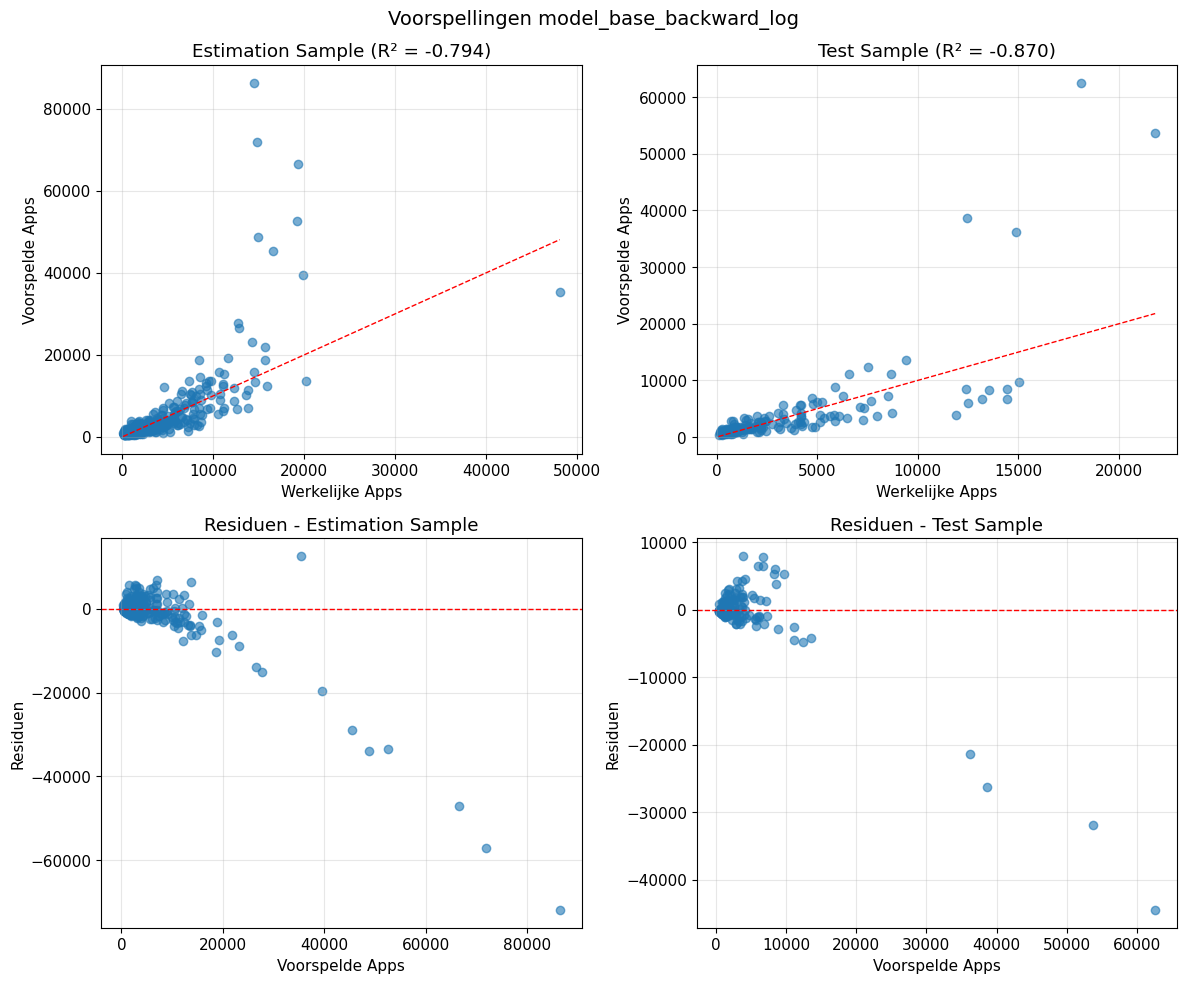


=== Overfitting Analyse ===
RMSE verschil (test - train): 13 (0.2%)
R² verschil (test - train): 0.0758
⚠️ Lichte overfitting mogelijk

=== Voorbeeldvoorspellingen ===
Observatie 1: Werkelijk = 2,186, Voorspeld = 1,164, Fout = 1,022 (46.8%)
Observatie 4: Werkelijk = 193, Voorspeld = 713, Fout = 520 (269.5%)
Observatie 13: Werkelijk = 1,267, Voorspeld = 1,389, Fout = 122 (9.6%)
Observatie 14: Werkelijk = 494, Voorspeld = 641, Fout = 147 (29.7%)
Observatie 20: Werkelijk = 713, Voorspeld = 2,881, Fout = 2,168 (304.0%)


In [137]:
# === 5k — Voorspellingen maken met model_base_backward_log ===
# Bronnen: Lecture 5 (prediction & assessment), PSDS p. 140

# Zorg ervoor dat log_Apps bestaat in beide samples
if "log_Apps" not in estimation_sample.columns:
    estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"])
if "log_Apps" not in test_sample.columns:
    test_sample["log_Apps"] = np.log(test_sample["Apps"])

# === 1️⃣ VOORSPELLINGEN OP LOG-SCHAAL ===
print("=== Voorspellingen op log-schaal ===")

# Estimation sample voorspellingen
train_pred_log = model_base_backward_log.predict(estimation_sample)
train_rmse_log = np.sqrt(mean_squared_error(estimation_sample["log_Apps"], train_pred_log))
train_r2_log = r2_score(estimation_sample["log_Apps"], train_pred_log)

# Test sample voorspellingen  
test_pred_log = model_base_backward_log.predict(test_sample)
test_rmse_log = np.sqrt(mean_squared_error(test_sample["log_Apps"], test_pred_log))
test_r2_log = r2_score(test_sample["log_Apps"], test_pred_log)

print(f"Estimation sample (log-schaal): RMSE = {train_rmse_log:.4f}, R² = {train_r2_log:.4f}")
print(f"Test sample (log-schaal):       RMSE = {test_rmse_log:.4f}, R² = {test_r2_log:.4f}")

# === 2️⃣ TERUG NAAR APPS-SCHAAL MET DUAN SMEARING ===
print("\n=== Duan Smearing Correctie ===")

# Bereken smearing factor uit training residuen
train_residuals_log = estimation_sample["log_Apps"] - train_pred_log
smearing_factor = np.mean(np.exp(train_residuals_log))
print(f"Duan smearing factor: {smearing_factor:.4f}")

# Transformeer voorspellingen terug naar Apps-schaal
train_pred_apps = np.exp(train_pred_log) * smearing_factor
test_pred_apps = np.exp(test_pred_log) * smearing_factor

# === 3️⃣ EVALUATIE OP APPS-SCHAAL ===
print("\n=== Voorspellingen op Apps-schaal ===")

# Metrics berekenen
train_rmse_apps = np.sqrt(mean_squared_error(estimation_sample["Apps"], train_pred_apps))
train_r2_apps = r2_score(estimation_sample["Apps"], train_pred_apps)
train_mae_apps = np.mean(np.abs(estimation_sample["Apps"] - train_pred_apps))

test_rmse_apps = np.sqrt(mean_squared_error(test_sample["Apps"], test_pred_apps))
test_r2_apps = r2_score(test_sample["Apps"], test_pred_apps)
test_mae_apps = np.mean(np.abs(test_sample["Apps"] - test_pred_apps))

# Baseline vergelijking (voorspel gemiddelde)
baseline_pred = np.repeat(estimation_sample["Apps"].mean(), len(test_sample))
baseline_rmse = np.sqrt(mean_squared_error(test_sample["Apps"], baseline_pred))

print(f"Estimation sample (Apps): RMSE = {train_rmse_apps:,.0f}, R² = {train_r2_apps:.4f}, MAE = {train_mae_apps:,.0f}")
print(f"Test sample (Apps):       RMSE = {test_rmse_apps:,.0f}, R² = {test_r2_apps:.4f}, MAE = {test_mae_apps:,.0f}")
print(f"Baseline RMSE (gemiddelde): {baseline_rmse:,.0f}")

# Verbetering t.o.v. baseline
improvement = (1 - test_rmse_apps/baseline_rmse) * 100
print(f"Verbetering t.o.v. baseline: {improvement:.1f}%")

# === 4️⃣ SAMENVATTING TABEL ===
print("\n=== Samenvatting Resultaten ===")
results_df = pd.DataFrame({
    'Sample': ['Estimation', 'Test'],
    'RMSE_log': [train_rmse_log, test_rmse_log],
    'R²_log': [train_r2_log, test_r2_log],
    'RMSE_Apps': [train_rmse_apps, test_rmse_apps],
    'R²_Apps': [train_r2_apps, test_r2_apps],
    'MAE_Apps': [train_mae_apps, test_mae_apps]
})
print(results_df.round(4))

# === 5️⃣ VISUALISATIES ===
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Voorspellingen model_base_backward_log', fontsize=14)

# Plot 1: Estimation sample - Apps schaal
axes[0,0].scatter(estimation_sample["Apps"], train_pred_apps, alpha=0.6)
axes[0,0].plot([estimation_sample["Apps"].min(), estimation_sample["Apps"].max()],
               [estimation_sample["Apps"].min(), estimation_sample["Apps"].max()], 
               'r--', lw=1)
axes[0,0].set_xlabel('Werkelijke Apps')
axes[0,0].set_ylabel('Voorspelde Apps')
axes[0,0].set_title(f'Estimation Sample (R² = {train_r2_apps:.3f})')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Test sample - Apps schaal  
axes[0,1].scatter(test_sample["Apps"], test_pred_apps, alpha=0.6)
axes[0,1].plot([test_sample["Apps"].min(), test_sample["Apps"].max()],
               [test_sample["Apps"].min(), test_sample["Apps"].max()], 
               'r--', lw=1)
axes[0,1].set_xlabel('Werkelijke Apps')
axes[0,1].set_ylabel('Voorspelde Apps')
axes[0,1].set_title(f'Test Sample (R² = {test_r2_apps:.3f})')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Residuen estimation
train_residuals_apps = estimation_sample["Apps"] - train_pred_apps
axes[1,0].scatter(train_pred_apps, train_residuals_apps, alpha=0.6)
axes[1,0].axhline(0, color='red', linestyle='--', lw=1)
axes[1,0].set_xlabel('Voorspelde Apps')
axes[1,0].set_ylabel('Residuen')
axes[1,0].set_title('Residuen - Estimation Sample')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Residuen test
test_residuals_apps = test_sample["Apps"] - test_pred_apps
axes[1,1].scatter(test_pred_apps, test_residuals_apps, alpha=0.6)
axes[1,1].axhline(0, color='red', linestyle='--', lw=1)
axes[1,1].set_xlabel('Voorspelde Apps')
axes[1,1].set_ylabel('Residuen')
axes[1,1].set_title('Residuen - Test Sample')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === 6️⃣ OVERFITTING CHECK ===
print("\n=== Overfitting Analyse ===")
rmse_diff = abs(test_rmse_apps - train_rmse_apps)
rmse_diff_pct = (rmse_diff / train_rmse_apps) * 100
r2_diff = abs(test_r2_apps - train_r2_apps)

print(f"RMSE verschil (test - train): {rmse_diff:,.0f} ({rmse_diff_pct:.1f}%)")
print(f"R² verschil (test - train): {r2_diff:.4f}")

if rmse_diff_pct < 10 and r2_diff < 0.05:
    print("✅ Geen sterke aanwijzingen voor overfitting")
elif rmse_diff_pct < 20 and r2_diff < 0.10:
    print("⚠️ Lichte overfitting mogelijk")
else:
    print("❌ Mogelijke overfitting - test prestatie veel slechter")

# === 7️⃣ VOORBEELDVOORSPELLINGEN ===
print("\n=== Voorbeeldvoorspellingen ===")
# Neem eerste 5 test observaties als voorbeeld
for i in range(min(5, len(test_sample))):
    idx = test_sample.index[i]
    actual = test_sample.loc[idx, "Apps"]
    predicted = test_pred_apps.loc[idx]
    error = abs(actual - predicted)
    error_pct = (error / actual) * 100

    print(f"Observatie {idx}: Werkelijk = {actual:,.0f}, Voorspeld = {predicted:,.0f}, "
          f"Fout = {error:,.0f} ({error_pct:.1f}%)")

## 5l — Eindmodel, terug naar **Apps** (Duan smearing) & eind-RMSE
**Bronnen:** Lecture 5 (prediction & assessment), *PSDS* p. 140

<small style="color: lightblue;">
 (l) Vergelijk de voorspelkracht (mbv. mean squared error) van het model op de
 estimation sample met die op de test sample. Wat concludeer je
 </small>

In [138]:
# Bereken MSE voor beide samples

# Zorg dat log_Apps bestaat in beide samples
if "log_Apps" not in estimation_sample.columns:
	estimation_sample["log_Apps"] = np.log(estimation_sample["Apps"].clip(lower=1))
if "log_Apps" not in test_sample.columns:
	test_sample["log_Apps"] = np.log(test_sample["Apps"].clip(lower=1))

# Voorspellingen op log-schaal
train_pred_log = model_base_backward_log.predict(estimation_sample)
test_pred_log = model_base_backward_log.predict(test_sample)

# MSE op log-schaal
train_mse_log = mean_squared_error(estimation_sample["log_Apps"], train_pred_log)
test_mse_log = mean_squared_error(test_sample["log_Apps"], test_pred_log)

# MSE op Apps-schaal (met Duan smearing)
train_residuals_log = estimation_sample["log_Apps"] - train_pred_log
smearing_factor = np.mean(np.exp(train_residuals_log))

train_pred_apps = np.exp(train_pred_log) * smearing_factor
test_pred_apps = np.exp(test_pred_log) * smearing_factor

train_mse_apps = mean_squared_error(estimation_sample["Apps"], train_pred_apps)
test_mse_apps = mean_squared_error(test_sample["Apps"], test_pred_apps)

print("=== MSE Vergelijking ===")
print(f"Estimation sample (log): MSE = {train_mse_log:.6f}")
print(f"Test sample (log):       MSE = {test_mse_log:.6f}")
print(f"Verschil (test/train):   {test_mse_log/train_mse_log:.3f}")
print()
print(f"Estimation sample (Apps): MSE = {train_mse_apps:,.0f}")
print(f"Test sample (Apps):       MSE = {test_mse_apps:,.0f}")
print(f"Verschil (test/train):    {test_mse_apps/train_mse_apps:.3f}")

=== MSE Vergelijking ===
Estimation sample (log): MSE = 0.315100
Test sample (log):       MSE = 0.355211
Verschil (test/train):   1.127

Estimation sample (Apps): MSE = 27,105,725
Test sample (Apps):       MSE = 26,971,904
Verschil (test/train):    0.995
